In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
amzn = pd.read_csv('AMZN_stocks_data.csv')
amzn.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


In [8]:
# Quiz
# Create a line plot of `Opening price` and `Closing price` 
# of Amazon Stock for the year 2007 using  `amzn` dataframe.

In [20]:
# i) Filter : 
amzn_2007 = amzn[amzn['Date'].str.contains('2007')]
amzn_2007.head()

,Date,Open,High,Low,Close,Volume,Name
251,2007-01-03,38.68,39.06,38.05,38.70,12441282,AMZN
252,2007-01-04,38.59,39.14,38.26,38.90,6328615,AMZN
253,2007-01-05,38.72,38.79,37.60,38.37,6623820,AMZN
254,2007-01-08,38.22,38.31,37.17,37.50,6784631,AMZN
255,2007-01-09,37.60,38.06,37.34,37.78,5703051,AMZN


<Axes: xlabel='Date', ylabel='Open'>

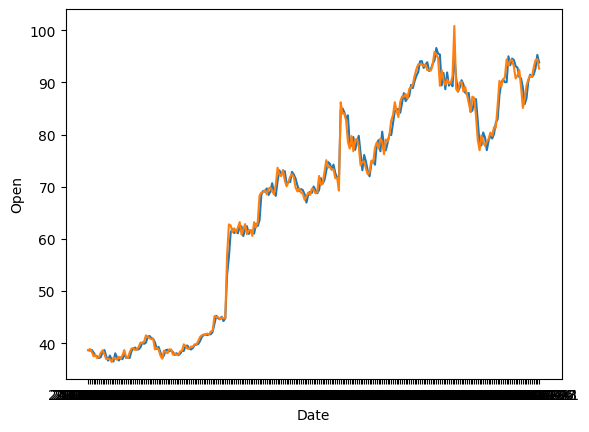

In [34]:
# ii) Viz.  (seaborn!)
sns.lineplot(x = amzn_2007['Date'],y = amzn_2007['Open'])
sns.lineplot(x = amzn_2007['Date'],y = amzn_2007['Close'])

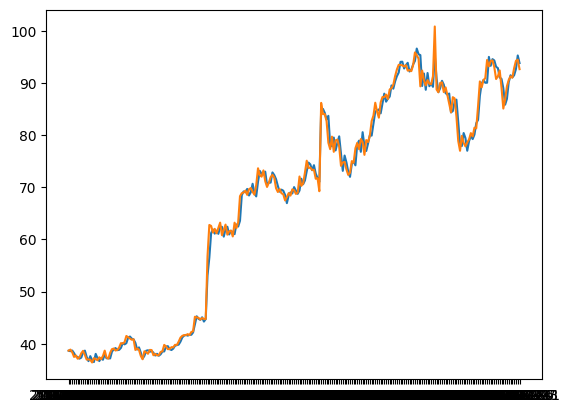

In [40]:
# ii) Viz.  (matplotlib!)
plt.plot(amzn_2007['Date'],amzn_2007['Open'])
plt.plot(amzn_2007['Date'],amzn_2007['Close'])

In [44]:
# Quiz
#i. Create a barplot of the average closing price (Close) for each year.

# ii. Create a barplot of the average closing price (Close) for each year,
# split by whether the high price of the day exceeded  $1000$ dollars or not.
# Hint: Use the hue and estimator parameters of the sns.barplot method.

In [54]:
#i. 
amzn['Year'] = amzn['Date'].str[0:4]
amzn.head()

,Date,Open,High,Low,Close,Volume,Name,Year
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN,2006
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN,2006
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN,2006
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN,2006
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN,2006


<Axes: xlabel='Close', ylabel='Year'>

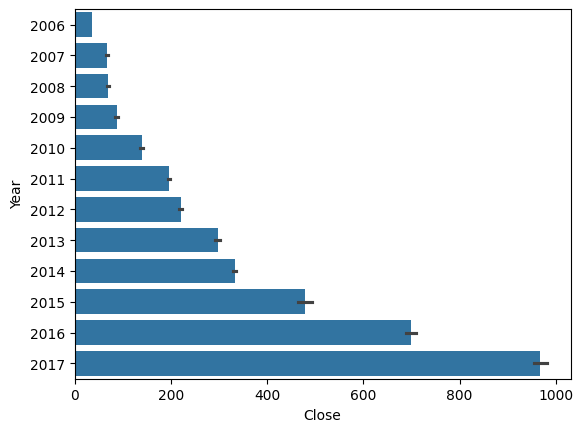

In [56]:
sns.barplot(data = amzn, y = 'Year', x = 'Close', estimator = 'mean')

In [58]:
# ii. Create a barplot of the average closing price (Close) for each year,
# split by whether the high price of the day exceeded  $1000$ dollars or not.
# Hint: Use the hue and estimator parameters of the sns.barplot method.

In [60]:
amzn.head()

,Date,Open,High,Low,Close,Volume,Name,Year
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN,2006
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN,2006
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN,2006
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN,2006
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN,2006


In [62]:
amzn['high_1000']  = amzn['High'] > 1000

In [64]:
amzn.head()

,Date,Open,High,Low,Close,Volume,Name,Year,high_1000
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN,2006,False
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN,2006,False
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN,2006,False
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN,2006,False
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN,2006,False


In [74]:
avg_close_split = amzn.groupby(['Year','high_1000'])['Close'].mean().reset_index()
avg_close_split

,Year,high_1000,Close
0,2006,False,35.909323
1,2007,False,67.229482
2,2008,False,69.880040
3,2009,False,87.281825
4,2010,False,139.169602
5,2011,False,196.663849
6,2012,False,220.303680
7,2013,False,298.032222
8,2014,False,332.550913
9,2015,False,478.138294


<Axes: xlabel='Close', ylabel='Year'>

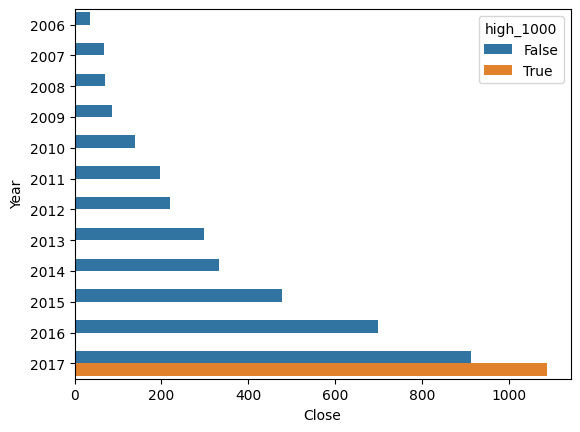

In [76]:
sns.barplot(data = avg_close_split, y = 'Year', x = 'Close', estimator = 'mean',
           hue = 'high_1000')

In [78]:
# What is the distribution of the `Closing price` (Close) split by
# whether the volume of stocks traded exceeded the median volume?
# (boxplot)

In [84]:
# 1. median --> volumne
# 2. create volume > median volumne
# 3. 2 boxplots

In [86]:
median_volume = amzn['Volume'].median()
median_volume

4724100.0

In [88]:
amzn['high_vol'] = amzn['Volume'] > median_volume

In [90]:
amzn.head()

,Date,Open,High,Low,Close,Volume,Name,Year,high_1000,high_vol
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN,2006,False,True
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN,2006,False,True
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN,2006,False,True
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN,2006,False,True
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN,2006,False,True


<Axes: xlabel='high_vol', ylabel='Close'>

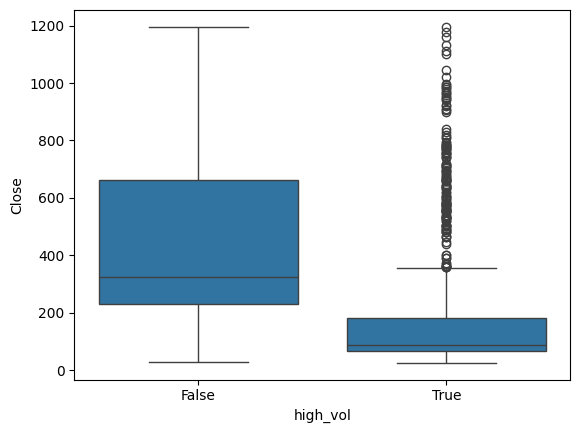

In [92]:
sns.boxplot(data=amzn, x = 'high_vol',y = 'Close')

In [94]:
# Tell me the distribution of CLOSE price with bins = 30
# 2 graphs - matplotlib and seaborn!

Text(0.5, 1.0, 'Distribution of closing price of amazon stocks')

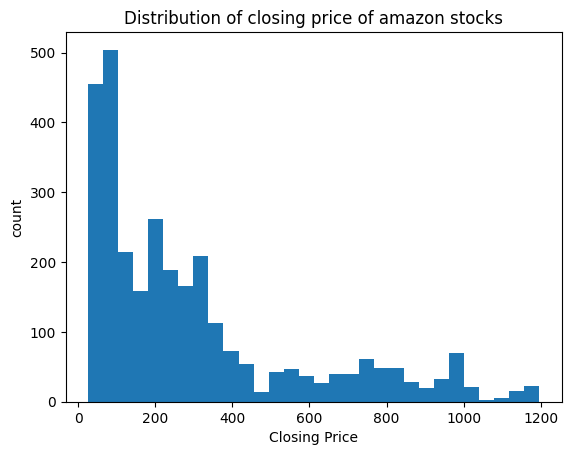

In [100]:
plt.hist(amzn['Close'],bins = 30)
plt.xlabel('Closing Price') 
plt.ylabel('count') 
plt.title('Distribution of closing price of amazon stocks')

Text(0.5, 1.0, 'Distribution of closing price of amazon stocks')

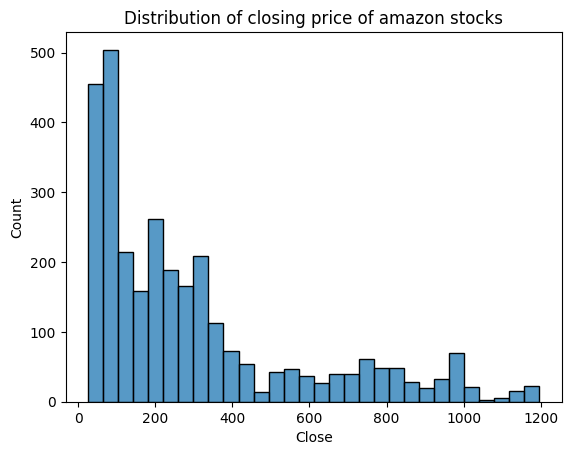

In [104]:
sns.histplot(data=amzn,x='Close',bins = 30)
plt.title('Distribution of closing price of amazon stocks')

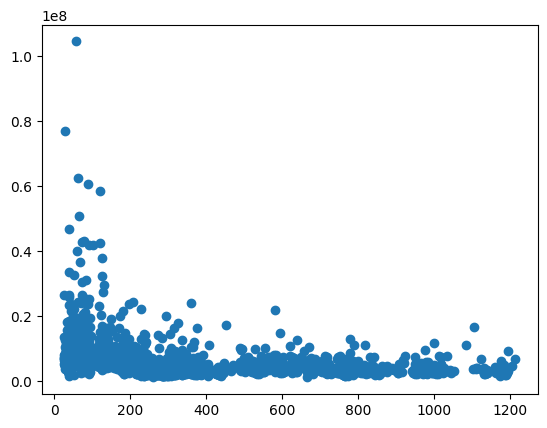

In [114]:
# 1) Create a scatter plot between Volume and High Price
plt.scatter(y = amzn['Volume'], x = amzn['High'])

In [108]:
# Create 2 histograms for the opening price:
#     1) before 2010
#     2) incl and after 2010

In [116]:
df4=amzn[amzn['Date'].str[0:4].astype(int)<2010]
df5=amzn[amzn['Date'].str[0:4].astype(int)>=2010] 

(array([192., 169.,  57., 147., 269., 125.,   0.,   6.,  21.,  21.]),
 array([ 26.09 ,  37.843,  49.596,  61.349,  73.102,  84.855,  96.608,
        108.361, 120.114, 131.867, 143.62 ]),
 <BarContainer object of 10 artists>)

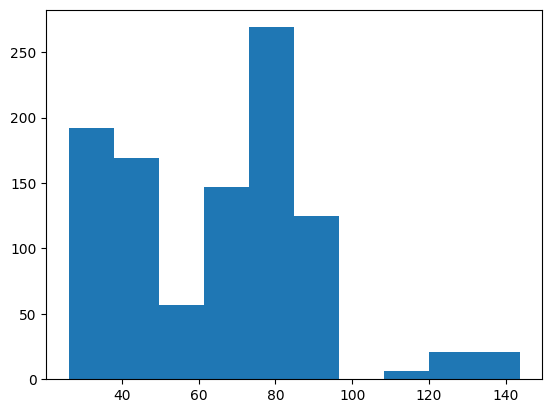

In [118]:
plt.hist(df4['Open'],bins=10)

(array([552., 540., 284.,  89.,  93., 135., 129.,  91.,  57.,  42.]),
 array([ 105.92 ,  215.816,  325.712,  435.608,  545.504,  655.4  ,
         765.296,  875.192,  985.088, 1094.984, 1204.88 ]),
 <BarContainer object of 10 artists>)

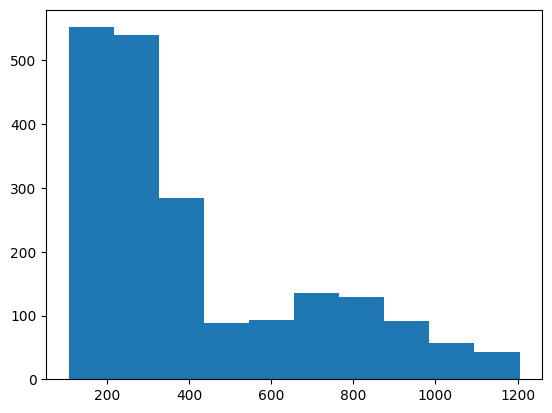

In [122]:
plt.hist(df5['Open'],bins=10)